<a href="https://colab.research.google.com/github/brainer3220/Corona19-_Forecast/blob/master/corona19_confirmed_prediction_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

# Load Dataset

In [0]:
# Get data from Github
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recover = pd.read_csv(url, error_bad_lines=False)

In [3]:
df_korea = confirmed[confirmed['Country/Region'] == 'South Korea']
df_korea

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20
33,NaN,South Korea,36.0,128.0,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736


# Make it Simple

In [4]:
df_korea = df_korea.T[4:]

df_korea = df_korea.reset_index().rename(columns={'index': 'date', 33: 'confirmed'})

df_korea['date'] = pd.to_datetime(df_korea['date'])

# df_korea = df_korea.append([
#   {'date': pd.to_datetime('2020-03-01'), 'confirmed': 3736}], ignore_index=True)

df_korea.tail()

,date,confirmed
35,2020-02-26,1261
36,2020-02-27,1766
37,2020-02-28,2337
38,2020-02-29,3150
39,2020-03-01,3736


# Plot

In [5]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_korea.date,
        y=df_korea.confirmed,
        name='Confirmed in Korea'
    )
)

fig

# Facebook Prophet

In [6]:
df_prophet = df_korea.rename(columns={
    'date': 'ds',
    'confirmed': 'y'
})

df_prophet.tail()

,ds,y
35,2020-02-26,1261
36,2020-02-27,1766
37,2020-02-28,2337
38,2020-02-29,3150
39,2020-03-01,3736


# Create a Model

# Add changepoints to Make More Flexible
- https://facebook.github.io/prophet/docs/trend_changepoints.html

In [7]:
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible
    changepoint_range=0.98, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

m.fit(df_prophet)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


# Plot changepoints

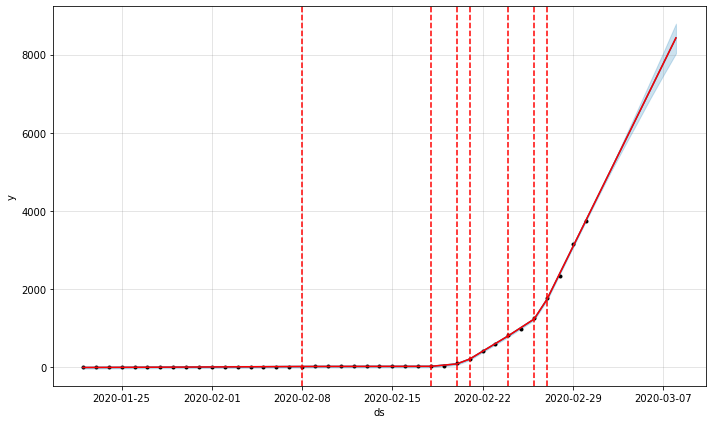

In [8]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [9]:
recover.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,0,2,2,3,5,7,14,20,23,34,47,59,72,88,105,127,157,193,221,255,280,361,413,474,539,597,637,663,712,744,792,821,868,873
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,4,4,4,5,9,9,12,23,24,31,33,34,37,44,48,56,69,80,98,108,114,122,145,153,169,178,189,198,215,235,248,257,271,276
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,0,1,1,1,3,7,9,9,15,24,31,39,51,66,79,102,128,152,184,207,225,254,274,299,316,328,335,349,372,384,401,422,438,450
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,0,0,0,0,0,0,1,3,11,14,20,24,35,39,45,53,57,63,71,82,90,93,112,126,149,162,170,183,199,218,228,235,243,247
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,0,0,0,0,0,3,3,4,6,6,9,12,16,17,24,31,39,39,49,54,58,62,65,71,76,76,78,80,80,81,81,82,82,84


In [10]:
re_korea = recover[recover['Country/Region'] == 'South Korea']
re_korea

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20
33,NaN,South Korea,36.0,128.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,7,7,7,9,9,10,12,12,16,16,16,18,18,22,22,22,22,27,30


In [11]:
re_korea = re_korea.T[4:]
re_korea = re_korea.reset_index().rename(columns={'index': 'date', 33: 'recover'})
re_korea['date'] = pd.to_datetime(re_korea['date'])
re_korea.tail()

,date,recover
35,2020-02-26,22
36,2020-02-27,22
37,2020-02-28,22
38,2020-02-29,27
39,2020-03-01,30


In [12]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=re_korea.date,
        y=re_korea.recover,
        name='Recovered in Korea'
    )
)

In [13]:
re_prophet = re_korea.rename(columns={
    'date': 'ds',
    'recover': 'y'
})

re_prophet.tail()

,ds,y
35,2020-02-26,22
36,2020-02-27,22
37,2020-02-28,22
38,2020-02-29,27
39,2020-03-01,30


In [14]:
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible
    changepoint_range=0.99, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

m.fit(re_prophet)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

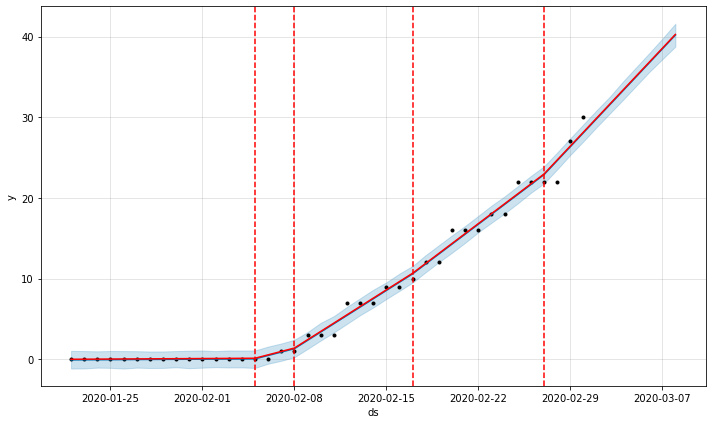

In [15]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [16]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,7,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,3,3,4,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [17]:
de_korea = death[death['Country/Region'] == 'South Korea']
de_korea

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20
33,NaN,South Korea,36.0,128.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,6,8,10,12,13,13,16,17


In [18]:
de_korea = de_korea.T[4:]
de_korea = de_korea.reset_index().rename(columns={'index': 'date', 33: 'death'})
de_korea['date'] = pd.to_datetime(de_korea['date'])
de_korea.tail()

,date,death
35,2020-02-26,12
36,2020-02-27,13
37,2020-02-28,13
38,2020-02-29,16
39,2020-03-01,17


In [19]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=de_korea.date,
        y=de_korea.death,
        name='Death in Korea'
    )
)

In [20]:
de_prophet = de_korea.rename(columns={
    'date': 'ds',
    'death': 'y'
})
de_prophet.tail()

,ds,y
35,2020-02-26,12
36,2020-02-27,13
37,2020-02-28,13
38,2020-02-29,16
39,2020-03-01,17


In [21]:
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible
    changepoint_range=0.98, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

m.fit(de_prophet)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

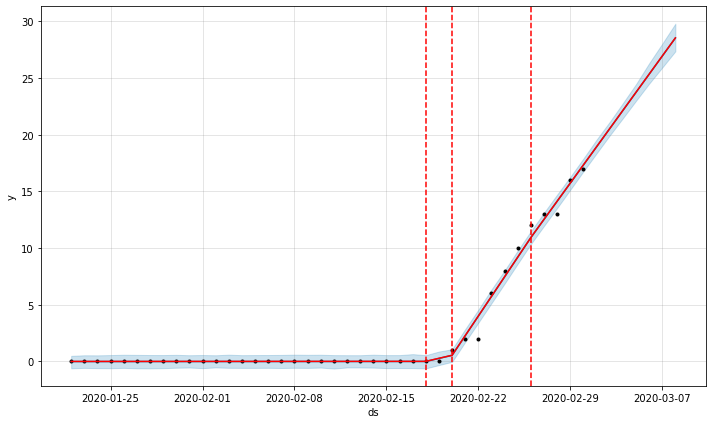

In [22]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)